#CALTECH UCSD BIRDS 200-2011 DATASET
This is a image dataset with 200 different types of birds(classes).
Here I have used a modified version of the ResNet9 architecture and have made a ResNet13 architecture.
The main difficulty in this dataset is making the model efficient itself.Since all the images are birds chossing a lower resolution confuses the computer and hence the model is not able to give much accuracy.
At the end I have mentioned how the model can be improved further and what could be the reasons for its shortcomings.

#Downloading and preparing data

##Importing all the required libraries.

In [1]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import shutil
from torchvision import models
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

##Downloading the dataset and making train and test files

In [2]:
dataset_url='https://s3.amazonaws.com/fast-ai-imageclas/CUB_200_2011.tgz' 

In [3]:
download_url(dataset_url,'.')

In [4]:
with tarfile.open('./CUB_200_2011.tgz','r:gz') as tar:     #unzipping the data file
    tar.extractall(path='./data') 

In [5]:
data_dir = './data/CUB_200_2011'

In [6]:
print(os.listdir(data_dir))

['images', 'parts', 'images.txt', 'train_test_split.txt', 'bounding_boxes.txt', 'image_class_labels.txt', 'classes.txt', 'attributes', 'README']


In [7]:
image_dir = data_dir +'/images/'

In [8]:
print(os.listdir(image_dir))

['106.Horned_Puffin', '020.Yellow_breasted_Chat', '094.White_breasted_Nuthatch', '086.Pacific_Loon', '148.Green_tailed_Towhee', '152.Blue_headed_Vireo', '183.Northern_Waterthrush', '166.Golden_winged_Warbler', '097.Orchard_Oriole', '012.Yellow_headed_Blackbird', '016.Painted_Bunting', '143.Caspian_Tern', '021.Eastern_Towhee', '090.Red_breasted_Merganser', '177.Prothonotary_Warbler', '109.American_Redstart', '083.White_breasted_Kingfisher', '130.Tree_Sparrow', '001.Black_footed_Albatross', '005.Crested_Auklet', '163.Cape_May_Warbler', '017.Cardinal', '182.Yellow_Warbler', '108.White_necked_Raven', '178.Swainson_Warbler', '164.Cerulean_Warbler', '191.Red_headed_Woodpecker', '140.Summer_Tanager', '058.Pigeon_Guillemot', '115.Brewer_Sparrow', '052.Pied_billed_Grebe', '034.Gray_crowned_Rosy_Finch', '103.Sayornis', '070.Green_Violetear', '189.Red_bellied_Woodpecker', '072.Pomarine_Jaeger', '146.Forsters_Tern', '007.Parakeet_Auklet', '149.Brown_Thrasher', '181.Worm_eating_Warbler', '066.Weste

In [9]:
os.curdir

'.'

In [10]:
temp_file = open(os.curdir+'/data/CUB_200_2011/train_test_split.txt') #train_test split

In [11]:
os.mkdir(os.curdir+'/data/CUB_200_2011/train') #creating train directory to save images for training

In [12]:
os.mkdir(os.curdir+'/data/CUB_200_2011/test')  #creating test directory to save images for testing

In [13]:
#Listing out all folders , sub-folders and files in the goven dataset
i=0 
for folder,sub_folder,files in os.walk(image_dir):
    if i==0:
        i+=1
        continue
    else:
        print("Currently looking at folder: "+ folder)
    print('\n')
    print("THE SUBFOLDERS ARE: ")
    for sub_fold in sub_folder:
        print("\t Subfolder: "+sub_fold )
    
    print('\n')
    
    print("THE FILES ARE: ")
    for f in files:
        print("\t File: "+f)
    print('\n')
        

Streaming output truncated to the last 5000 lines.
	 File: Herring_Gull_0105_46113.jpg
	 File: Herring_Gull_0049_46508.jpg
	 File: Herring_Gull_0042_46637.jpg
	 File: Herring_Gull_0004_48046.jpg
	 File: Herring_Gull_0014_47814.jpg
	 File: Herring_Gull_0140_46455.jpg
	 File: Herring_Gull_0052_46810.jpg
	 File: Herring_Gull_0120_48822.jpg
	 File: Herring_Gull_0082_47540.jpg
	 File: Herring_Gull_0016_48969.jpg
	 File: Herring_Gull_0054_46164.jpg
	 File: Herring_Gull_0027_46389.jpg
	 File: Herring_Gull_0065_48098.jpg
	 File: Herring_Gull_0051_46276.jpg
	 File: Herring_Gull_0075_48935.jpg
	 File: Herring_Gull_0071_48751.jpg
	 File: Herring_Gull_0116_47222.jpg
	 File: Herring_Gull_0064_47832.jpg
	 File: Herring_Gull_0129_46708.jpg
	 File: Herring_Gull_0045_46845.jpg
	 File: Herring_Gull_0078_48718.jpg
	 File: Herring_Gull_0048_46061.jpg
	 File: Herring_Gull_0015_46353.jpg
	 File: Herring_Gull_0114_46956.jpg
	 File: Herring_Gull_0130_46675.jpg
	 File: Herring_Gull_0145_46220.jpg
	 File: Herri

In [14]:
classes_file = open(data_dir+'/classes.txt') #class file containing species name

In [15]:
classes=[]

In [16]:
classes_file.seek(0)
for lines in classes_file.readlines():
    classes.append(lines.split()[1])

In [17]:
classes 

['001.Black_footed_Albatross',
 '002.Laysan_Albatross',
 '003.Sooty_Albatross',
 '004.Groove_billed_Ani',
 '005.Crested_Auklet',
 '006.Least_Auklet',
 '007.Parakeet_Auklet',
 '008.Rhinoceros_Auklet',
 '009.Brewer_Blackbird',
 '010.Red_winged_Blackbird',
 '011.Rusty_Blackbird',
 '012.Yellow_headed_Blackbird',
 '013.Bobolink',
 '014.Indigo_Bunting',
 '015.Lazuli_Bunting',
 '016.Painted_Bunting',
 '017.Cardinal',
 '018.Spotted_Catbird',
 '019.Gray_Catbird',
 '020.Yellow_breasted_Chat',
 '021.Eastern_Towhee',
 '022.Chuck_will_Widow',
 '023.Brandt_Cormorant',
 '024.Red_faced_Cormorant',
 '025.Pelagic_Cormorant',
 '026.Bronzed_Cowbird',
 '027.Shiny_Cowbird',
 '028.Brown_Creeper',
 '029.American_Crow',
 '030.Fish_Crow',
 '031.Black_billed_Cuckoo',
 '032.Mangrove_Cuckoo',
 '033.Yellow_billed_Cuckoo',
 '034.Gray_crowned_Rosy_Finch',
 '035.Purple_Finch',
 '036.Northern_Flicker',
 '037.Acadian_Flycatcher',
 '038.Great_Crested_Flycatcher',
 '039.Least_Flycatcher',
 '040.Olive_sided_Flycatcher',
 '

In [18]:
#This piece of code sorts the images to training and test file according to the specification in train_test_split.txt file.
i = 0
j = 0
for folder, sub_folder, files in os.walk(image_dir):

    if i == 0:
        temp_file.seek(0)
        for sub_fold in sub_folder:
            os.mkdir(os.curdir+'/data/CUB_200_2011/train'+f'/{sub_fold}')
            os.mkdir(os.curdir+'/data/CUB_200_2011/test'+f'/{sub_fold}')
        i += 1
        continue
    else:
        file_name = classes[j]
        for file in files:
                line = temp_file.readline()
                if line.split()[1] == '1':
                    shutil.move(folder+f'/{file}', os.curdir +'/data/CUB_200_2011/train'+f'/{file_name}')
                else:
                    shutil.move(folder+f'/{file}', os.curdir+'/data/CUB_200_2011/test'+f'/{file_name}')
        j += 1

#Converting the raw image data into tensors
I this section we convert the raw data into pytorch tensors and also apply certain transformations to avoid overfitting of data.
Also the data is split into training and validation dataset and loaded in the dataloader according to the batch size.

In [19]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.Resize((128,128)),
                         tt.RandomCrop((128,128),padding=4,padding_mode='reflect'),
                         tt.RandomHorizontalFlip(),  
                         tt.ToTensor(),
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.Resize((128,128)),tt.ToTensor(),tt.Normalize(*stats)]) 

In [20]:
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

In [21]:
train_ds #training_dataset

Dataset ImageFolder
    Number of datapoints: 5994
    Root location: ./data/CUB_200_2011/train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=PIL.Image.BILINEAR)
               RandomCrop(size=(128, 128), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

In [22]:
batch_size = 100  #no of images to be loaded at a time.

In [23]:
valid_ds #validation_dataset

Dataset ImageFolder
    Number of datapoints: 5794
    Root location: ./data/CUB_200_2011/test
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

In [24]:
train_dl = DataLoader(train_ds,batch_size,shuffle=True,num_workers=3,pin_memory=True)
valid_dl = DataLoader(valid_ds,batch_size*2,num_workers=3,pin_memory=True)

In [25]:
def show_example(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  001.Black_footed_Albatross (0)


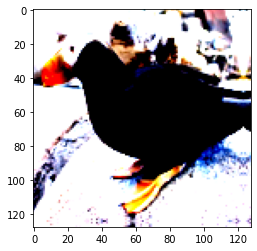

In [26]:
show_example(*train_ds[0])

In [27]:
train_ds[0]

(tensor([[[2.1070, 2.1264, 2.1264,  ..., 1.6805, 1.2541, 1.1765],
          [2.0101, 2.0876, 2.1070,  ..., 1.8744, 0.6338, 0.1104],
          [1.8550, 2.1652, 2.3202,  ..., 2.0876, 1.4479, 1.1959],
          ...,
          [1.3704, 1.3510, 1.3898,  ..., 1.3316, 1.5642, 0.8276],
          [1.3316, 1.5061, 1.5642,  ..., 1.6612, 1.3704, 1.3316],
          [1.3898, 1.3316, 1.4091,  ..., 1.5836, 1.3510, 1.3898]],
 
         [[2.1838, 2.2035, 2.2035,  ..., 1.6724, 1.3774, 1.3184],
          [2.1248, 2.1641, 2.1838,  ..., 1.9085, 0.8661, 0.1974],
          [2.0068, 2.2625, 2.4001,  ..., 2.1445, 1.5938, 1.2594],
          ...,
          [1.2004, 1.0824, 1.1808,  ..., 1.2594, 1.4364, 0.7678],
          [1.1808, 1.3184, 1.3578,  ..., 1.5938, 1.2004, 1.2201],
          [1.3184, 1.1808, 1.2594,  ..., 1.3774, 1.2004, 1.2594]],
 
         [[2.4416, 2.4611, 2.4806,  ..., 1.8953, 1.5441, 1.3490],
          [2.4221, 2.4611, 2.4221,  ..., 2.1879, 1.0563, 0.2759],
          [2.3440, 2.4806, 2.5781,  ...,

In [28]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

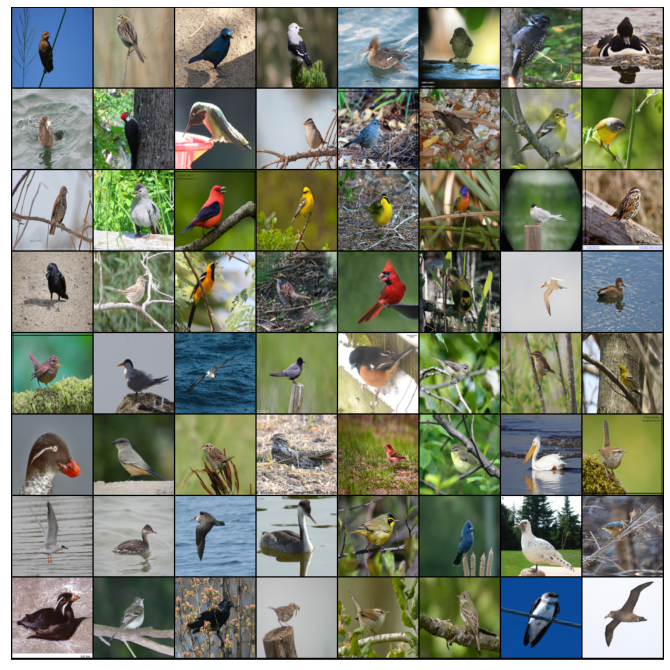

In [29]:
show_batch(train_dl)

#Loading data in GPU


In [30]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [31]:
device = get_default_device()
device

device(type='cuda')

In [32]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

#Defining the model

In [33]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

##ResNet13 model

In [34]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet13(ImageClassificationBase):
    def __init__(self, in_channels=3, num_classes=200):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)      
        self.conv2 = conv_block(64, 128, pool=True) 
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128)) #output = 128 * 64 * 64
        
        self.conv3 = conv_block(128, 256, pool=True) #256 * 32 *32
        self.conv4 = conv_block(256, 512, pool=True) #512 * 16 * 16
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512)) 

        self.conv5 = conv_block(512, 1024, pool=True) #1024 * 8 * 8
        self.conv6 = conv_block(1024, 2048, pool=True) #2048 * 4 * 4
        self.res3 = nn.Sequential(conv_block(2048, 2048), conv_block(2048, 2048)) 

        
        
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(2048,num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.res3(out) + out
  
        out = self.classifier(out)
        return out

In [35]:
model = to_device(ResNet13(3, 200), device)
model

ResNet13(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=T

##Training function

In [36]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

#Training Stage

In [37]:
history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.005517241079360247, 'val_loss': 5.298388957977295}]

In [38]:
#Required hyperparameters
epochs = 100
max_lr = 0.001
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [39]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00004, train_loss: 5.6464, val_loss: 4.9881, val_acc: 0.0305
Epoch [1], last_lr: 0.00005, train_loss: 4.8521, val_loss: 4.6437, val_acc: 0.0593
Epoch [2], last_lr: 0.00006, train_loss: 4.4703, val_loss: 4.4132, val_acc: 0.0817
Epoch [3], last_lr: 0.00008, train_loss: 4.1074, val_loss: 4.1655, val_acc: 0.1070
Epoch [4], last_lr: 0.00010, train_loss: 3.7868, val_loss: 4.1860, val_acc: 0.1271
Epoch [5], last_lr: 0.00013, train_loss: 3.5122, val_loss: 4.0960, val_acc: 0.1449
Epoch [6], last_lr: 0.00016, train_loss: 3.1903, val_loss: 4.1636, val_acc: 0.1626
Epoch [7], last_lr: 0.00020, train_loss: 2.9623, val_loss: 4.1636, val_acc: 0.1706
Epoch [8], last_lr: 0.00024, train_loss: 2.7261, val_loss: 4.0612, val_acc: 0.1851
Epoch [9], last_lr: 0.00028, train_loss: 2.5381, val_loss: 3.9743, val_acc: 0.1918
Epoch [10], last_lr: 0.00032, train_loss: 2.3899, val_loss: 4.3156, val_acc: 0.1694
Epoch [11], last_lr: 0.00037, train_loss: 2.2092, val_loss: 3.8896, val_acc: 0.2176
Ep

#Verifing and Graphical analysing data

In [50]:
train_time = ' 2:28:48 '

In [41]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

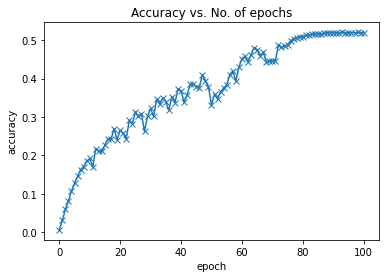

In [42]:
plot_accuracies(history)

In [43]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

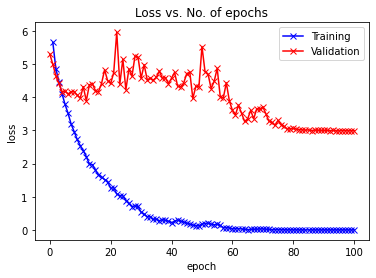

In [44]:
plot_losses(history)

In [45]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

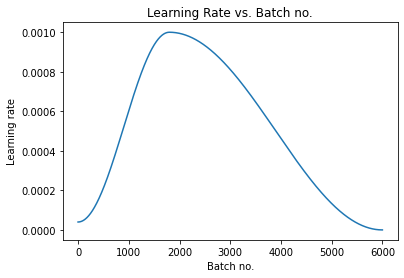

In [46]:
plot_lrs(history)

In [47]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: 002.Laysan_Albatross , Predicted: 002.Laysan_Albatross


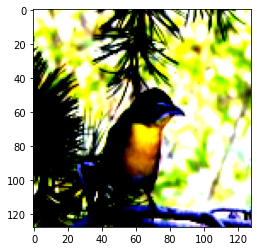

In [57]:
img, label = valid_ds[56]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

#Conclusion and scope for improvement

The model made is a truly a state of the art model and would work really well with CIFAR10 or CIFAR100 dataset.
This dataset (birds) is difficult since our model has to learn not only to recognize a bird but also recognize 200 different species of birds.
The model can be made more accurate by using larger pixel size image and also a Resnet18 dataset and even transfer learning.
The dataset also provides boxes for each bird which if implemented would make the model more accurate.
Nonetheless applying the above parameters requires more computational power.
Also it can be clearly seen that the training_loss is much less than the validation_loss .The taining_loss reduces significantly whereas the training loss varies up and down.This implies that either the training is leading to overfitting or the data is not distributed properly to the validation and training dataset.Also keeping a low learning rate is better to train the model.

##My takeaways
It was my first ever dataset to train and I directly chose a difficult dataset.But the overall learning experience was good.
I will try to resarch more on this and make a more accurate and efficent model for this. 